The notebooks contains code for data processing and model development and evaluation using california housing dataset for predicting median house value


In [77]:
# Import necessary libraries and functions
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Data processing

In [110]:
# data formating
housing = fetch_california_housing() # access the data 
print(housing.DESCR) # print the description of the dataset

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [111]:
# prepare labels and features   
x = housing['data']
y = housing['target']

In [112]:
# scaling the data 
x_scaled = (x - x.mean()) / x.std() # standardize the data
y_scaled = (y - y.mean()) / y.std() # standardize the data

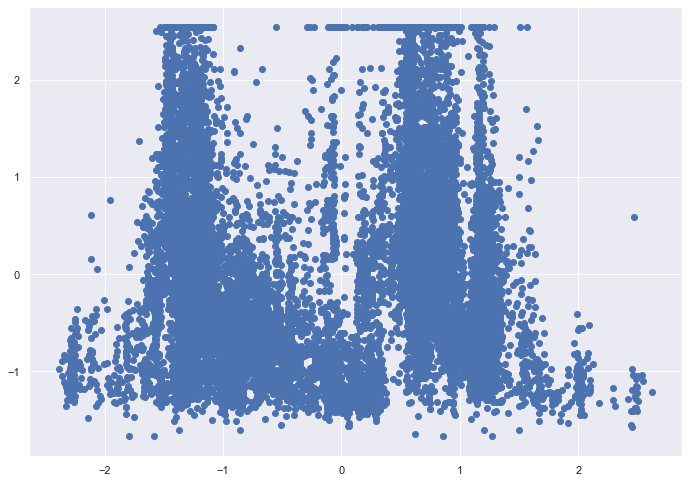

In [76]:
# plot longitude and y
# plt.scatter(x_scaled['Longitude'], y)
# plt.scatter(x_scaled['Longitude'], y_scaled)


# Exploratory data analysis

# Regression model development

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled, test_size=0.20)

In [114]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(16512, 8) (4128, 8)
(16512,) (4128,)


16512

In [178]:
models = []
models.append(("SVR",SVR()))
models.append(("LinearRegression",LinearRegression()))
models.append(("KNeighborsRegression", KNeighborsRegressor()))
models.append(("SGDRegressor", SGDRegressor()))
models.append(("BayesianRidge", BayesianRidge()))
models.append(("DecisionTreeRegressor", DecisionTreeRegressor()))
models.append(("GradientBoostingRegressor", GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []

# loop to fit each model and evaluate
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append((r2, mse))
    names.append(name)
    print("{},{},{}".format(name,r2,mse))

SVR,-0.03269679407537751,1.0965343521304824
LinearRegression,0.6050480097632226,0.4193664851305024
KNeighborsRegression,0.1422332262865028,0.9107907944413843
SGDRegressor,0.0004006788905381864,1.0613909138201785
BayesianRidge,0.605012437807229,0.41940425601537706
DecisionTreeRegressor,0.5965055061427974,0.42843705524046594
GradientBoostingRegressor,0.7904446136713058,0.22250933778595178


<AxesSubplot:title={'center':'Model Performance'}>

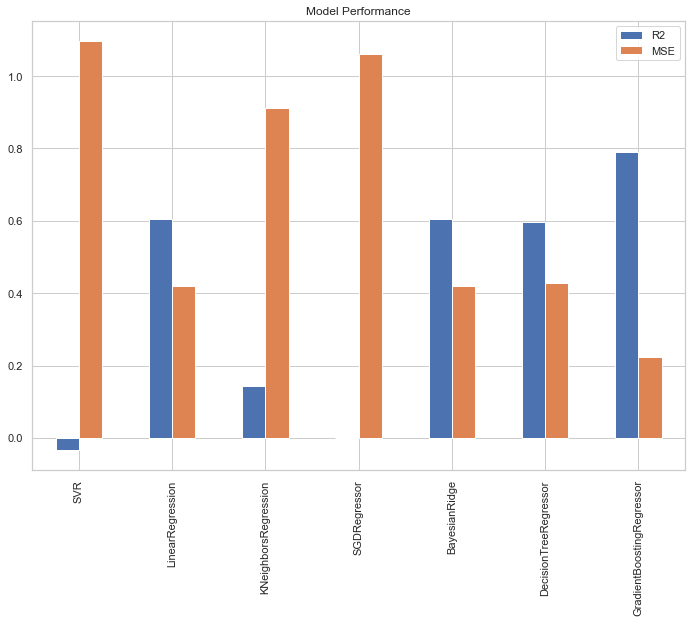

In [180]:
# bar plot of the results
results = pd.DataFrame(results, columns=['R2', 'MSE'], index=names)
results.plot(kind='bar', title='Model Performance')

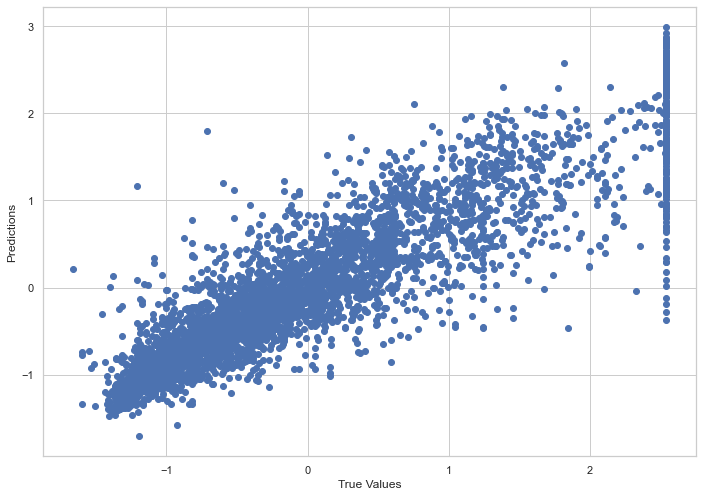

In [182]:
# model fitting
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

# model evaluation
y_pred = model.predict(x_test)

# linearity between true values and predictions
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [184]:
# coefficient of determination score and mean squared error for the model
r2_s = r2_score(y_test, y_pred)
mse_err = mean_squared_error(y_test, y_pred)
print(r2_s, mse_err)

0.7904465024254401 0.22250733227590958
